# Project: Tweeter Data Analysis

## Table of Contents
<ul>
  <li><a href="#introduction">Introduction</a></li>
  <li><a href="#gathering">Data Gathering</a></li>
    <ul>
      <li><a href="#downloaded">Loading the downloaded file</a></li>
      <li><a href="#programmatic">Downloading file programmatically</a></li>
      <li><a href="#API">Extracting data from API.</a></li>
    </ul>
  <li><a href="#Assessing">Data Assessment</a></li>
    <ul>
      <li><a href="#archive">Twitter Archive Assessment</a></li>
      <li><a href="#image">Assessing the Image Predictions Dataframe</a></li>
      <li><a href="#likes">Assessing the `likes and retweet` dataframe</a></li>
    </ul>
  <li><a href="#cleaning">Data Cleaning</a></li>
  <li><a href="#storing">Storing the cleaned data</a></li>
  <li><a href="#analysis">Data Analysis and Visualization</a></li>
  <li><a href="#conclusion">Conclusion</a></li>
    
</ul>

<a id="introduction"></a>
# Introduction
> This data wrangling project is focused on gathering, assessing, cleaning, and analyzing dog ratings from tweeter. In the gathering process, the data will be obtained using three different methods, which include: <br>
>> - Downloading a file manually from an online server
>> - Downloading a file programmatically from an online server
>> - Querying the Tweeter API to obtain the number of likes and retweets by tweet id.

> In the data assessment stage, the goal will be to identify and document `data quality` and `tidiness` issues. This will pave way for the data cleaning stage.<br>
> After all the issues in the datasets have been identified, the next quest will be to clean both quality and tidiness issues. After cleaning is complete, analysis and visualization will commense.

## Import the required libraries.

In [1]:
import configparser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import os
import re

from bs4 import BeautifulSoup

%matplotlib inline

<a id="gathering"></a>
# Data Gathering

<a id="downloaded"></a>
## Load the `twitter archive enhanced csv` file into the pandas dataframe

In [2]:
Dog_tweets_df = pd.read_csv('Datasets/twitter-archive-enhanced.csv')

<a id="programmatic"></a>
## Download the tweet image predictions

In [3]:
# # Check the if the required folder exists. If it does not exist, create it
# folder_name = 'Datasets'
# if not os.path.exists (folder_name):
#     os.makedirs(folder_name)

# # Use the request.get method to get access the data from the server.
# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# response = requests.get(url)

# # Save the responses in a .tsv file
# with open (os.path.join(folder_name,url.split('/')[-1]), mode = 'wb') as file:
#     file.write(response.content)

### Load the Image prediction file into the pandas dataframe

In [4]:
image_prediction_df = pd.read_csv('Datasets/image-predictions.tsv', sep='\t')

<a id="API"></a>
## Get additional data from the Twitter API

In [5]:
# Read the configurations
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

In [6]:
# Authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# # Extract all the tweet IDs in the WeRateDogs Twitter archive and save them in a python list.
# tweet_response_counts = []
# for tweet_id in Dog_tweets_df.tweet_id:
#     try:
#         tweet_info = api.get_status(tweet_id, tweet_mode='extended')
#     except Exception:
#         pass
#     finally:
#         tweet_id = tweet_info.id
#         retweet_count = tweet_info.retweet_count
#         favorite_count = tweet_info.favorite_count
        
#         tweet_response_counts.append({'tweet_id':tweet_id,
#                                       'retweet_count':retweet_count,
#                                       'favorite_count':favorite_count})
#         print(tweet_id)
# counts_df = pd.DataFrame(tweet_response_counts, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [8]:
# counts_df.to_csv('Datasets/reaction_counts.csv', index=False)

### Load the dataframe into the pandas dataframe

In [9]:
reaction_counts_df = pd.read_csv('Datasets/reaction_counts.csv')

<a id="Assessing"></a>
# Assessing Data

<a id="archive"></a>
## 1. Twitter Archive Assessment

In [10]:
# Display the dataframe
Dog_tweets_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
Dog_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# Check whether there are abnormal values in the rating numerator column
Dog_tweets_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

> Note that the maximum numerator rating is abnormally high. Let use view that particular record to gain more insight about it.

In [13]:
Dog_tweets_df.query('rating_numerator == 1776.000000')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


> It appears that the entry is not a problem. Perhaps, the person who rated the dog liked it that much.

In [14]:
# Check whether there are abnormal values in the rating denominator column
Dog_tweets_df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [15]:
Dog_tweets_df.duplicated().sum()

0

In [16]:
Dog_tweets_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

<a id="image"></a>

## 2. Assessing the Image Predictions Dataframe

In [17]:
# Display the dataframe
image_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
# Check the datatypes of every column an whether any column has null entries
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# Check for duplicates
image_prediction_df.duplicated().sum()

0

In [20]:
# Check if the dataframe has abnormal numerical values.
image_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


<a id="likes"></a>
## 3. Assessing the `likes and retweet` dataframe

In [21]:
# Display the dataframe
reaction_counts_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33815
1,892177421306343426,5302,29320
2,891815181378084864,3481,22050
3,891689557279858688,7219,36903
4,891327558926688256,7762,35311
...,...,...,...
2351,666049248165822465,37,89
2352,666044226329800704,115,247
2353,666033412701032449,36,100
2354,666029285002620928,39,112


In [22]:
# Check for null entries in the dataframe and the datatype of every column.
reaction_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2356 non-null   int64
 1   retweet_count   2356 non-null   int64
 2   favorite_count  2356 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [23]:
# Check for abnormal numerical values.
reaction_counts_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.356000e+03,2356.000000,2356.00000
mean,7.427737e+17,2492.997878,7157.22708
std,6.857010e+16,4193.078114,11028.70282
min,6.660209e+17,1.000000,0.00000
25%,6.783989e+17,500.750000,1243.00000
50%,7.196279e+17,1186.000000,3116.00000
75%,7.993373e+17,2879.000000,8857.50000
max,8.924206e+17,70758.000000,144922.00000


<a id="assessmentReport"></a>
## Assessment Report

### Quality Issues
#### Dog_tweet dataframe
1. The dataframe containts retweet information which is not needed since a user can retweet their own tweet.

2. The `in_reply_to_status_id` column has 2278 null entries<br>
3. The `in_reply_to_user_id` column has 2278 null entries<br>
4. The `retweeted_status_id` column has 2175 null entries<br>
5. The `retweeted_status_user_id` column has 2175 null entries<br>
6. The `retweeted_status_timestamp` column has 2175 null entries<br>
7. The `expanded_urls` column has 59 null entries<br>
8. Some of the entries in the `expanded_urls` column contains double entries that are duplicates.
9. `source column` contain a tags (`<a/>`).
10. Erroneous datatypes (timestamp, retweeted_status_timestamp columns).
11. Some of the entries in the rating_numerator and rating_denominator columns are wrong.
12. The rating numerator and rating denominator have data types as string instead of float

#### image prediction dataframe
1. This dataframe has non-descriptive column names.
2. Comparing the number of entries in the image prediction dataframe and the dog tweets dataframe, it is clear that some of the tweets have no corresponding image predictions in the image prediction dataframe.

#### Favourite counts & retweet counts dataframe
- No issues detected

### Tidiness Issues
#### Dog_tweet dataframe
1. `timestamp column`  has two variable entries (Date & Time).
2. `retweeted_status_timestamp` has two variable entries (Date & Time).
2. `source column` has two variables (source name & source url).
3. `text column` has four variables in the same column (The tweet, rating_numerator, rating_denominator, Tweet link). **note: the tweet link in this column is similar to the link in the source column**
4. The `doggo`, `floofer`, `pupper`, `puppo` should be variables.

#### image prediction dataframe
- No isses detected

#### Favourite counts & retweet counts dataframe
1. We do not need this table because the information it holds (favourite counts and retweet counts) should appear alongside each respective tweet in the dog tweet dataframe.


<a id="cleaning"></a>

# Data Cleaning

In [24]:
# Make copies of the datasets
tweet_clean = Dog_tweets_df.copy()
image_prediction_clean = image_prediction_df.copy()
reaction_count_clean = reaction_counts_df.copy()

## Quality issues

## `Dog Tweet dataframe`

#### Define:
##### The dataframe containts retweet information which is not needed since a user can retweet their own tweet
To solve this problem, we need to drop all the rows that contain retweet information.

#### Code

In [25]:
tweet_clean = tweet_clean[tweet_clean.retweeted_status_id.isnull()]

#### Test

In [26]:
# Use the .notnull() method to check if all the rows with retweeted status id have been dropped
verify_drop = tweet_clean[tweet_clean.retweeted_status_id.notnull()]

# If the drop was successful, the verify drop dataframe should be empty
verify_drop

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Dealing with missing data

#### Define:
- The dog_tweet dataframe:
> - `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp` columns are all empty. We need to use .drop to delete these columns from the dataframe. <br>
> - The `in_reply_to_status_id`, `in_reply_to_user_id`,  have many missing records, all of which we have no means to recover. Since we will not be needing then during analysis, we can drop them off.
- For the `expanded_urls` column, only few entries (59) are missing. However, we have no means of finding the data. So, we can hold it as it is for now. 

#### code

In [27]:
tweet_clean = tweet_clean.drop(['in_reply_to_status_id',
                  'in_reply_to_user_id',
                  'retweeted_status_id',
                  'retweeted_status_user_id',
                  'retweeted_status_timestamp'],
                 axis=1)

#### Test

In [28]:
# If the columns were dropped successfully, the assert statement will run without an assertion error.
dropped_columns = ['in_reply_to_status_id',
                  'in_reply_to_user_id',
                  'retweeted_status_id',
                  'retweeted_status_user_id',
                  'retweeted_status_timestamp']
for col in dropped_columns:
    assert col not in tweet_clean.columns

### Dealing with duplicated records
Some of the entries in the `expanded_urls` column contains double entries that are duplicates.
#### Define:
For the entries with two URLs, only pick the first url and drop the others

#### Code

In [29]:
separator = ','
for entry in tweet_clean.expanded_urls:
    if separator in str(entry):
        tweet_clean.expanded_urls = entry.split(',')[0]

#### Test

In [30]:
# If the duplicated urls were removed successfully, this test will pass without an assertion error
for url in tweet_clean.expanded_urls:
    assert separator not in url

### `source column` contain a tags (`<a/>`).
#### Define
Extract the `href` and `name of the source` from the a tag. After the extraction, delete the old source column

#### code

In [31]:
for tag in tweet_clean.source:
    soup = BeautifulSoup(tag, "html.parser")
    tweet_clean['source_name'] = soup.find('a').contents[0]
    tweet_clean['source_url'] = soup.find('a').get('href')

# Now, delete the old column
tweet_clean.drop('source', axis=1, inplace=True)

#### Test

In [32]:
# Assert that the new columns have been added to the dataframe and that the old column has been downloaded.
# If the code above was successful, these assertion tests should pass without assertion errors.
new_column = ['source_name', 'source_url']
for col in new_column:
    assert col in tweet_clean.columns

assert 'source' not in tweet_clean.columns

### Erroneous datatypes (timestamp, retweeted_status_timestamp, columns).
#### Define:
> - Timestamp, retweeted_status_timestamp columns have some tidiness issues. Therefore, we hold this columns for now.

### Some of the entries in the rating_numerator and rating_denominator columns are wrong.
#### Define:
Drop the existing rating numerator and rating denominator columns and extract new values from the data in the text column.

#### code

In [33]:
# drop the existing rating numerator and rating denominator colunms
tweet_clean = tweet_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)

# extract the ratings from the text columns and create new rating numerator and rating denominator colunms
pattern = '(\d+\.?(\d+)?[/]\d+)'
tweet_clean['ratings'] = (tweet_clean['text'].str.extract(pattern)[0])
tweet_clean[['rating_numerator', 'rating_denominator']] = tweet_clean.ratings.str.split('/', expand = True)

# drop the ratings column
tweet_clean = tweet_clean.drop('ratings', axis=1)


#### Test

In [34]:
# use .info to display the dataframe and check if the changes have been made successfully.
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   expanded_urls       2175 non-null   object
 4   name                2175 non-null   object
 5   doggo               2175 non-null   object
 6   floofer             2175 non-null   object
 7   pupper              2175 non-null   object
 8   puppo               2175 non-null   object
 9   source_name         2175 non-null   object
 10  source_url          2175 non-null   object
 11  rating_numerator    2175 non-null   object
 12  rating_denominator  2175 non-null   object
dtypes: int64(1), object(12)
memory usage: 237.9+ KB


### The rating numerator and rating denominator have data types as string instead of float
#### Define:
convert the rating numerator and the rating denominator to floats.

#### code

In [35]:
tweet_clean.rating_numerator = tweet_clean.rating_numerator.astype(float)
tweet_clean.rating_denominator = tweet_clean.rating_denominator.astype(float)

#### test

In [36]:
# Display the info of the dataframe to check that the datatypes have been changed accordingly
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   text                2175 non-null   object 
 3   expanded_urls       2175 non-null   object 
 4   name                2175 non-null   object 
 5   doggo               2175 non-null   object 
 6   floofer             2175 non-null   object 
 7   pupper              2175 non-null   object 
 8   puppo               2175 non-null   object 
 9   source_name         2175 non-null   object 
 10  source_url          2175 non-null   object 
 11  rating_numerator    2175 non-null   float64
 12  rating_denominator  2175 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 237.9+ KB


## `Image Prediction dataframe`

### This dataframe has non-descriptive column names.
#### Define:
Change: <br>
> - img_num --> number_of_images<br>
> - p1 --> prediction_1<br>
> - p1_conf --> prediction_1_confidence<br>
> - p1_dog --> prediction_1_dog
> - p2 --> prediction_2<br>
> - p2_conf --> prediction_2_confidence<br>
> - p2_dog --> prediction_2_dog
> - p3 --> prediction_3<br>
> - p3_conf --> prediction_3_confidence<br>
> - p3_dog --> prediction_3_dog

#### code

In [37]:
image_prediction_clean.columns = ['tweet_id', 'jpg_url', 'number_of_images', 'prediction_1', 'prediction_1_confidence', 'prediction_1_dog', 'prediction_2', 'prediction_2_confidence', 'prediction_2_dog', 'prediction_3', 'prediction_3_confidence', 'prediction_3_dog']

#### test

In [38]:
image_prediction_clean.columns

Index(['tweet_id', 'jpg_url', 'number_of_images', 'prediction_1',
       'prediction_1_confidence', 'prediction_1_dog', 'prediction_2',
       'prediction_2_confidence', 'prediction_2_dog', 'prediction_3',
       'prediction_3_confidence', 'prediction_3_dog'],
      dtype='object')

### Comparing the number of entries in the image prediction dataframe and the dog tweets dataframe, it is clear that some of the tweets have no corresponding image predictions in the image prediction dataframe.
#### Define:
Since there are fewer entries in the in the image prediction dataframe than in the dog tweet dataframe, it is evident that some of the dog tweets dont have image predictions. Since we have no means of obtaining the predictions, there is nothing we can do to address this issue.

## Tidiness issues

## `Dog Tweet dataframe`

### Timestamp column has two variable entries (Date & Time).
#### Define:
Separate the timestamp column to form the date column and the time columns
> - first drop the '+0000' at the end of every entry
> - since the date and time are separated using a space, separate them and assign the entry to the left to the date column and that in the right of the space to the time column

#### code

In [39]:
for stamp in tweet_clean.timestamp:
    stamp = stamp[:-6]
    tweet_clean['date'], tweet_clean['time'] = stamp.split(' ', 1)

# Now, drop the old timestamp column
tweet_clean.drop('timestamp', axis=1, inplace=True)

#### Test

In [40]:
# Display the columns of the dataframe to check that the timestamp column has been created and that the date & time columns have been created
tweet_clean.columns

Index(['tweet_id', 'text', 'expanded_urls', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'source_name', 'source_url', 'rating_numerator',
       'rating_denominator', 'date', 'time'],
      dtype='object')

> Now that the timestamp has been separated as required, we can comfortably change the datatypes of the columns.

In [41]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   text                2175 non-null   object 
 2   expanded_urls       2175 non-null   object 
 3   name                2175 non-null   object 
 4   doggo               2175 non-null   object 
 5   floofer             2175 non-null   object 
 6   pupper              2175 non-null   object 
 7   puppo               2175 non-null   object 
 8   source_name         2175 non-null   object 
 9   source_url          2175 non-null   object 
 10  rating_numerator    2175 non-null   float64
 11  rating_denominator  2175 non-null   float64
 12  date                2175 non-null   object 
 13  time                2175 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 254.9+ KB


#### code

In [42]:
# change date and time columns to type datetime
tweet_clean.date = pd.to_datetime(tweet_clean.date)
tweet_clean.time = pd.to_datetime(tweet_clean.time)

#### Test

In [43]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   text                2175 non-null   object        
 2   expanded_urls       2175 non-null   object        
 3   name                2175 non-null   object        
 4   doggo               2175 non-null   object        
 5   floofer             2175 non-null   object        
 6   pupper              2175 non-null   object        
 7   puppo               2175 non-null   object        
 8   source_name         2175 non-null   object        
 9   source_url          2175 non-null   object        
 10  rating_numerator    2175 non-null   float64       
 11  rating_denominator  2175 non-null   float64       
 12  date                2175 non-null   datetime64[ns]
 13  time                2175 non-null   datetime64[n

### source column has two variables (source name & source url).
#### Define:
This column contained two sets of data within the 'a' tags. However, when extracting the content of the 'a' tags, this tidiness issue was solved since the source name and the source url were extracted and put into different columns.

### Text column has four variables in the same column (The tweet, rating_numerator, rating_denominator, Tweet link). note: the tweet link in this column is similar to the link in the source column
#### Define:
Drop the URLs from the message. Do not drop the ratings since the tweet message may be incomplete without the ratings.
Also drop the hash tags that appear at the end of the message.

#### code

In [44]:
pattern = 'http\S+'
hash_tags = '\s#[a-zA-Z]+'
tweet_clean.text = tweet_clean.text.replace(to_replace=pattern, value='', regex=True)
tweet_clean.text = tweet_clean.text.replace(to_replace=hash_tags, value='', regex=True)

#### test

In [45]:
# Assert that the links have been removed from the text. this should pass without an assertion error.
for text in tweet_clean.text:
    assert 'http'or 'https' not in tweet_clean.text
    print(text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) 
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

 
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 
This is Zoey. She doesn't want to be one of the scary sharks. Just wan

### The `doggo`, `floofer`, `pupper`, `puppo` should be variables under `Dog_stage` column
#### Define
combine the columns and separate the entries with a dash (-) then delete the word `None` to remain with the affectionate names only. Lastly, drop the old unwanted columns

#### code

In [46]:
tweet_clean["dog_stage"] = tweet_clean['doggo'] + tweet_clean['floofer'] + tweet_clean['pupper']+ tweet_clean['puppo']
tweet_clean.dog_stage = tweet_clean.dog_stage.str.replace('None', '')
# tweet_clean.dog_stage = tweet_clean.dog_stage.str.strip('-')

# Now drop the old columns
tweet_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [47]:
# Display the dataframe that has non-empty entries in the dog_stage column to confirm that the new combined
# column was created successfully.
tweet_clean[tweet_clean.dog_stage != '']

,tweet_id,text,expanded_urls,name,source_name,source_url,rating_numerator,rating_denominator,date,time,dog_stage
9,890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/668623201...,Cassie,Twitter for iPhone,http://twitter.com/download/iphone,14.0,10.0,2015-11-15,2022-07-01 22:32:08,doggo
12,889665388333682689,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/668623201...,None,Twitter for iPhone,http://twitter.com/download/iphone,13.0,10.0,2015-11-15,2022-07-01 22:32:08,puppo
14,889531135344209921,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/668623201...,Stuart,Twitter for iPhone,http://twitter.com/download/iphone,13.0,10.0,2015-11-15,2022-07-01 22:32:08,puppo
29,886366144734445568,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/668623201...,Roscoe,Twitter for iPhone,http://twitter.com/download/iphone,12.0,10.0,2015-11-15,2022-07-01 22:32:08,pupper
43,884162670584377345,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/668623201...,Yogi,Twitter for iPhone,http://twitter.com/download/iphone,12.0,10.0,2015-11-15,2022-07-01 22:32:08,doggo
...,...,...,...,...,...,...,...,...,...,...,...
1995,672594978741354496,Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/668623201...,Scott,Twitter for iPhone,http://twitter.com/download/iphone,9.0,10.0,2015-11-15,2022-07-01 22:32:08,pupper
2002,672481316919734272,Say hello to Jazz. She should be on the cover ...,https://twitter.com/dog_rates/status/668623201...,Jazz,Twitter for iPhone,http://twitter.com/download/iphone,12.0,10.0,2015-11-15,2022-07-01 22:32:08,pupper
2009,672254177670729728,This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/668623201...,Rolf,Twitter for iPhone,http://twitter.com/download/iphone,11.0,10.0,2015-11-15,2022-07-01 22:32:08,pupper
2015,672205392827572224,This is Opal. He's a Royal John Coctostan. Rea...,https://twitter.com/dog_rates/status/668623201...,Opal,Twitter for iPhone,http://twitter.com/download/iphone,9.0,10.0,2015-11-15,2022-07-01 22:32:08,pupper


In [48]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   text                2175 non-null   object        
 2   expanded_urls       2175 non-null   object        
 3   name                2175 non-null   object        
 4   source_name         2175 non-null   object        
 5   source_url          2175 non-null   object        
 6   rating_numerator    2175 non-null   float64       
 7   rating_denominator  2175 non-null   float64       
 8   date                2175 non-null   datetime64[ns]
 9   time                2175 non-null   datetime64[ns]
 10  dog_stage           2175 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 203.9+ KB


## `Favourite counts & retweet counts dataframe`

### We do not need this table because the information it holds (favourite counts and retweet counts) should appear alongside each respective tweet in the dog tweet dataframe.
#### Define:
Combine/merge the reactions count dataframe and the image prediction dataframe to the tweet dataframe on the tweet id

#### code

In [49]:
tweet_plus_reaction = pd.merge(tweet_clean, reaction_count_clean, on='tweet_id')
tweet_master = pd.merge(tweet_plus_reaction, image_prediction_clean, on='tweet_id')

#### test

In [50]:
# use the .head() method to check whether the dataframes were merged as required.
tweet_master.head()

,tweet_id,text,expanded_urls,name,source_name,source_url,rating_numerator,rating_denominator,date,time,...,number_of_images,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/668623201...,Phineas,Twitter for iPhone,http://twitter.com/download/iphone,13.0,10.0,2015-11-15,2022-07-01 22:32:08,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/668623201...,Tilly,Twitter for iPhone,http://twitter.com/download/iphone,13.0,10.0,2015-11-15,2022-07-01 22:32:08,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/668623201...,Archie,Twitter for iPhone,http://twitter.com/download/iphone,12.0,10.0,2015-11-15,2022-07-01 22:32:08,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/668623201...,Darla,Twitter for iPhone,http://twitter.com/download/iphone,13.0,10.0,2015-11-15,2022-07-01 22:32:08,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/668623201...,Franklin,Twitter for iPhone,http://twitter.com/download/iphone,12.0,10.0,2015-11-15,2022-07-01 22:32:08,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


<a id="storing"></a>

# Storing Data

In [51]:
# Check the if the required folder exists. If it does not exist, create it
folder_name = 'Datasets/Clean_data'
if not os.path.exists (folder_name):
    os.makedirs(folder_name)
    
tweet_master.to_csv('Datasets/Clean_data/twitter_archive_master.csv', index=False)

<a id="analysis"></a>

# Analyzing and Visualizing Data

In [52]:
# Load the cleaned dataset
df_clean = pd.read_csv('Datasets/Clean_data/twitter_archive_master.csv')

## Questions that need to be answered from the data
1. What is the proportion of image preditions that gave a dog image in the first, second, and third prediction? How do these proportions compare against each other?
2. Compare the population of dogs in different stages.
3. Is a particular dog stage associated with higher

> Since we will be needing to work with proportions in multiple occassions. To avoid repetition, it is elegant to define a function that we can invoke any time we want to calculate a proportion. The cell below defines a `proportion function`

In [53]:
# Defining the proportion funtion
def proportion(total, interest_items):
    """
    Description: This is a function that calculates the proportion of items of interest
    
    Inputs:
        total: This is the total number of items to be considered in calculating the proportions
        interest_items: This is the number of items of interest whose proportion needs to be calculated.
    Results:
        prop: This is the result obtained after dividing the interest_items by the total
    """
    if interest_items > total:
        result = "Items of interest must be less than or equal to the total number of items"
    else:
        result = interest_items/total
    return(result)

## Question 1A: What is the proportion of image preditions that gave a dog image in the first prediction?

In [54]:
total_prediction = df_clean.prediction_1_dog.value_counts().sum()
total_prediction

2012

### Proportion of image predictons that gave a dog image in the first prediction

In [55]:
# Number of True dog results in the 
prediction_1_true = df_clean.query('prediction_1_dog == True')
prediction_1_true = prediction_1_true.tweet_id.value_counts().sum()
prediction_1_true

1490

In [56]:
prop_prediction_1_true = proportion(total_prediction, prediction_1_true)
prop_prediction_1_true

0.7405566600397614

### Proportion of image predictons that did not give a dog image in the first prediction

In [57]:
# Number of False dog results in the first prediction
prediction_1_false = df_clean.query('prediction_1_dog == False')['tweet_id'].value_counts().sum()
prediction_1_false

522

In [58]:
prop_prediction_1_false = proportion(total_prediction, prediction_1_false)
prop_prediction_1_false

0.25944333996023855

#### Results:
These results indicate that the true dog predictions in the first prediction are about 0.74 while the false dog predictions make up about 0.26 of all predictions. The get better insights about these proportions, we need to visualize the results.

### Visualization of the proportions of True and False dog results in the first prediction

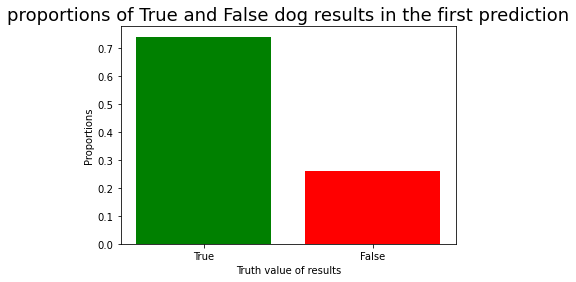

In [59]:
results = ['True', 'False']
proportions = [prop_prediction_1_true, prop_prediction_1_false]
colors = ['green', 'red']
plt.bar(results, proportions, color = colors)
plt.title('proportions of True and False dog results in the first prediction', fontsize=18)
plt.xlabel('Truth value of results', fontsize=10)
plt.ylabel('Proportions', fontsize=10);

## Question 1B: What is the proportion of image preditions that gave a dog image in the second prediction?

### Proportion of image predictons that gave a dog image in the second prediction

In [60]:
prediction_2_true = df_clean.query('prediction_2_dog == True')['tweet_id'].value_counts().sum()
prediction_2_true

1512

In [61]:
prop_prediction_2_true = proportion(total_prediction, prediction_2_true)
prop_prediction_2_true

0.7514910536779325

### Proportion of image predictons that did not give a dog image in the second prediction

In [62]:
# Number of False dog results in the first prediction
prediction_2_false = df_clean.query('prediction_2_dog == False')['tweet_id'].value_counts().sum()
prediction_2_false

500

In [63]:
prop_prediction_2_false = proportion(total_prediction, prediction_2_false)
prop_prediction_2_false

0.2485089463220676

#### Results:
These results indicate that the true dog predictions in the first prediction are about 0.75 while the false dog predictions make up about 0.25 of all predictions. The get better insights about these proportions, we need to visualize the results.

### Visualization of the proportions of True and False dog results in the second prediction

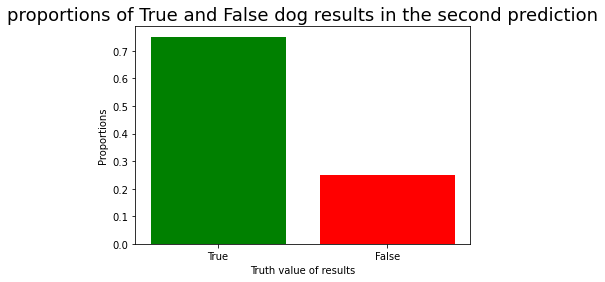

In [64]:
results = ['True', 'False']
proportions = [prop_prediction_2_true, prop_prediction_2_false]
colors = ['green', 'red']
plt.bar(results, proportions, color = colors)
plt.title('proportions of True and False dog results in the second prediction', fontsize=18)
plt.xlabel('Truth value of results', fontsize=10)
plt.ylabel('Proportions', fontsize=10);

## Question 1C: What is the proportion of image preditions that gave a dog image in the third prediction?

### Proportion of image predictons that gave a dog image in the third prediction

In [65]:
prediction_3_true = df_clean.query('prediction_3_dog == True')['tweet_id'].value_counts().sum()
prediction_3_true

1460

In [66]:
prop_prediction_3_true = proportion(total_prediction, prediction_3_true)
prop_prediction_3_true

0.7256461232604374

### Proportion of image predictons that did not give a dog image in the third prediction

In [67]:
# Number of False dog results in the first prediction
prediction_3_false = df_clean.query('prediction_3_dog == False')['tweet_id'].value_counts().sum()
prediction_3_false

552

In [68]:
prop_prediction_3_false = proportion(total_prediction, prediction_3_false)
prop_prediction_3_false

0.27435387673956263

#### Results:
These results indicate that the true dog predictions in the first prediction are about 0.75 while the false dog predictions make up about 0.25 of all predictions. The get better insights about these proportions, we need to visualize the results.

### Visualization of the proportions of True and False dog results in the third prediction

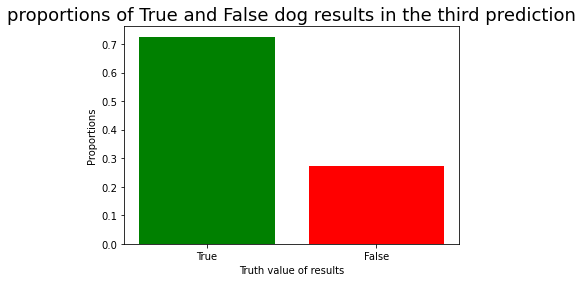

In [69]:
results = ['True', 'False']
proportions = [prop_prediction_3_true, prop_prediction_3_false]
colors = ['green', 'red']
plt.bar(results, proportions, color = colors)
plt.title('proportions of True and False dog results in the third prediction', fontsize=18)
plt.xlabel('Truth value of results', fontsize=10)
plt.ylabel('Proportions', fontsize=10);

## Question 1D: How do the proportions of true dog results for the first, second, and third prediction compare against each other?

> To compare the three truth results, we generate a bar graph that visualizes all the proportions in one frame

### Visualization of Proportions of true dog results for the first, second, and third prediction

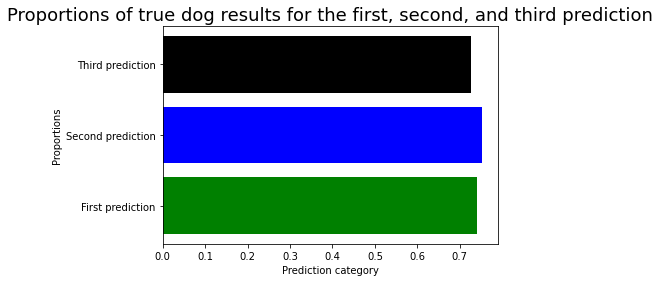

In [70]:
classes = ['First prediction', 'Second prediction', 'Third prediction']
proportions = [prop_prediction_1_true, prop_prediction_2_true, prop_prediction_3_true]
colors = ['green', 'blue', 'black']
plt.barh(classes, proportions, color = colors)
plt.title('Proportions of true dog results for the first, second, and third prediction', fontsize=18)
plt.xlabel('Prediction category', fontsize=10)
plt.ylabel('Proportions', fontsize=10);

#### Results:
This visualization shows that all the three predictions; the first, second, and third, all yielded almost similar proportions of true dog image results.

## Question 2: Compare the population of dogs in different stages.

In [71]:
df_clean.dog_stage.value_counts()

pupper          204
doggo            63
puppo            23
doggopupper      11
floofer           7
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

> The above values indicate that some dogs have multiple dogstages entered. To assess where the error came from, let's check the entries in the original dataframe.

In [72]:
Dog_tweets_df.query('doggo == "doggo" & pupper == "pupper"')['tweet_id'].value_counts().sum()

12

In [73]:
Dog_tweets_df.query('doggo == "doggo" & puppo == "puppo"')['tweet_id'].value_counts().sum()

1

In [74]:
Dog_tweets_df.query('doggo == "doggo" & floofer == "floofer"')['tweet_id'].value_counts().sum()

1

> The above information from the original dataframe suggests the error was most likely in the data entry process. some dogs have been listed in more than one stage. Since we have no means of identifying which of the two listed dog-stages is correct, we will have to work without the erroneously listed stages. Therefore, we visualize only the stages that have one dog stage entered.

### Visualization of the various dog stages

In [75]:
# Counts of every dog stage
pupper_count = df_clean.query('dog_stage == "pupper"')['tweet_id'].value_counts().sum()
doggo_count = df_clean.query('dog_stage == "doggo"')['tweet_id'].value_counts().sum()
puppo_count = df_clean.query('dog_stage == "puppo"')['tweet_id'].value_counts().sum()
floofer_count = df_clean.query('dog_stage == "floofer"')['tweet_id'].value_counts().sum()

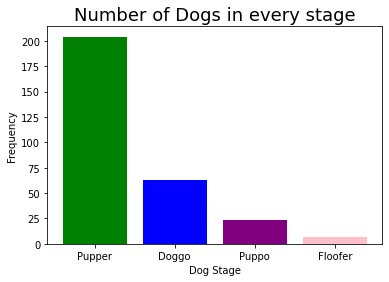

Text(0.5, 1.0, 'Percentage of recorded dog-stages')

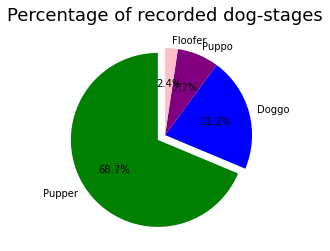

In [76]:
dog_stage = ['Pupper', 'Doggo', 'Puppo', 'Floofer']
counts = [pupper_count, doggo_count, puppo_count, floofer_count]
colors = ['green', 'blue', 'purple', 'pink']
plt.bar(dog_stage, counts, color = colors)
plt.title('Number of Dogs in every stage', fontsize=18)
plt.xlabel('Dog Stage', fontsize=10)
plt.ylabel('Frequency', fontsize=10);
plt.show()

# Use a pie chart to show the percentages for each dog stage
plt.pie(counts, labels = dog_stage, autopct='%1.1f%%', explode=[0.1,0,0, 0], colors = colors, startangle=90)
plt.title('Percentage of recorded dog-stages', fontsize= 18)

#### This shows that of the dogs whose dog stage has been listed in the data, pupper has the highest number, followed by Doggo, then puppo, and lastly 

<a id="conclusion"></a>

# Conclusion

##### - The image prediction results for the first, the second, and the third predictions all give between 72 % and 76% true dog images
> - From a general perspective, this suggests that the three predictions have an almost equal degree of success
##### - Considering only the dogs whose dog stage had been listed in the data:
> - Pupper constitutes about 68.7 %
> - Doggo constitutes about 21.2 %
> - Puppo constitutes about 7.7 %
> - Floofer constitutes about 2.4 %